# data dictionary

link: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
reference: https://www.kaggle.com/code/zeferinoibarraborja/bank-churn-ensemblemodels-and-deeplearning

1. RowNumber  —  corresponds to the record (row) number and has no effect on the output.

2. CustomerId  —  contains random values and has no effect on customer leaving the bank.

3. Surname  —  the surname of a customer has no impact on their decision to leave the bank.

4. CreditScore  —  can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

5. Geography  —  a customer’s location can affect their decision to leave the bank.

6. Gender  —  it’s interesting to explore whether gender plays a role in a customer leaving the bank.

7. Age  —  this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

8. Tenure  —  refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

9. Balance  —  also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

10. NumOfProducts  —  refers to the number of products that a customer has purchased through the bank.

11. HasCrCard  —  denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

12. IsActiveMember  —  active customers are less likely to leave the bank.

13. EstimatedSalary  —  as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

14. Exited  —  whether or not the customer left the bank.

15. Complain  —  customer has complaint or not.

16. Satisfaction Score  —  Score provided by the customer for their complaint resolution.

17. Card Type  —  type of card hold by the customer.

18. Points Earned  —  the points earned by the customer for using credit card.

Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

# import data

In [12]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
customer_bank = pd.read_csv('Customer-Churn-Records.csv')
cb = customer_bank.copy()

In [14]:
cb.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [15]:
cb.shape

(10000, 18)

In [16]:
# drop unecessary columns
del cb['RowNumber']

In [17]:
for i in cb.columns:
    print(i)

CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited
Complain
Satisfaction Score
Card Type
Point Earned


In [50]:
cb.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
4713,4714,15764448,Mackenzie,837,Germany,Male,35,0,144037.60,1,1,0,145325.32,0,0,5,DIAMOND,860
6884,6885,15662571,Maclean,639,France,Male,35,8,0.00,2,1,0,170483.90,0,0,3,DIAMOND,441
3037,3038,15741094,Sagese,693,France,Male,21,1,0.00,2,1,1,3494.02,0,0,3,PLATINUM,931
2681,2682,15576760,Onodugoadiegbemma,673,Germany,Male,36,5,73088.06,2,0,0,196142.26,0,0,3,GOLD,328
1138,1139,15698510,Onwudiwe,468,Germany,Male,42,9,181627.14,2,1,0,172668.39,0,0,1,PLATINUM,506


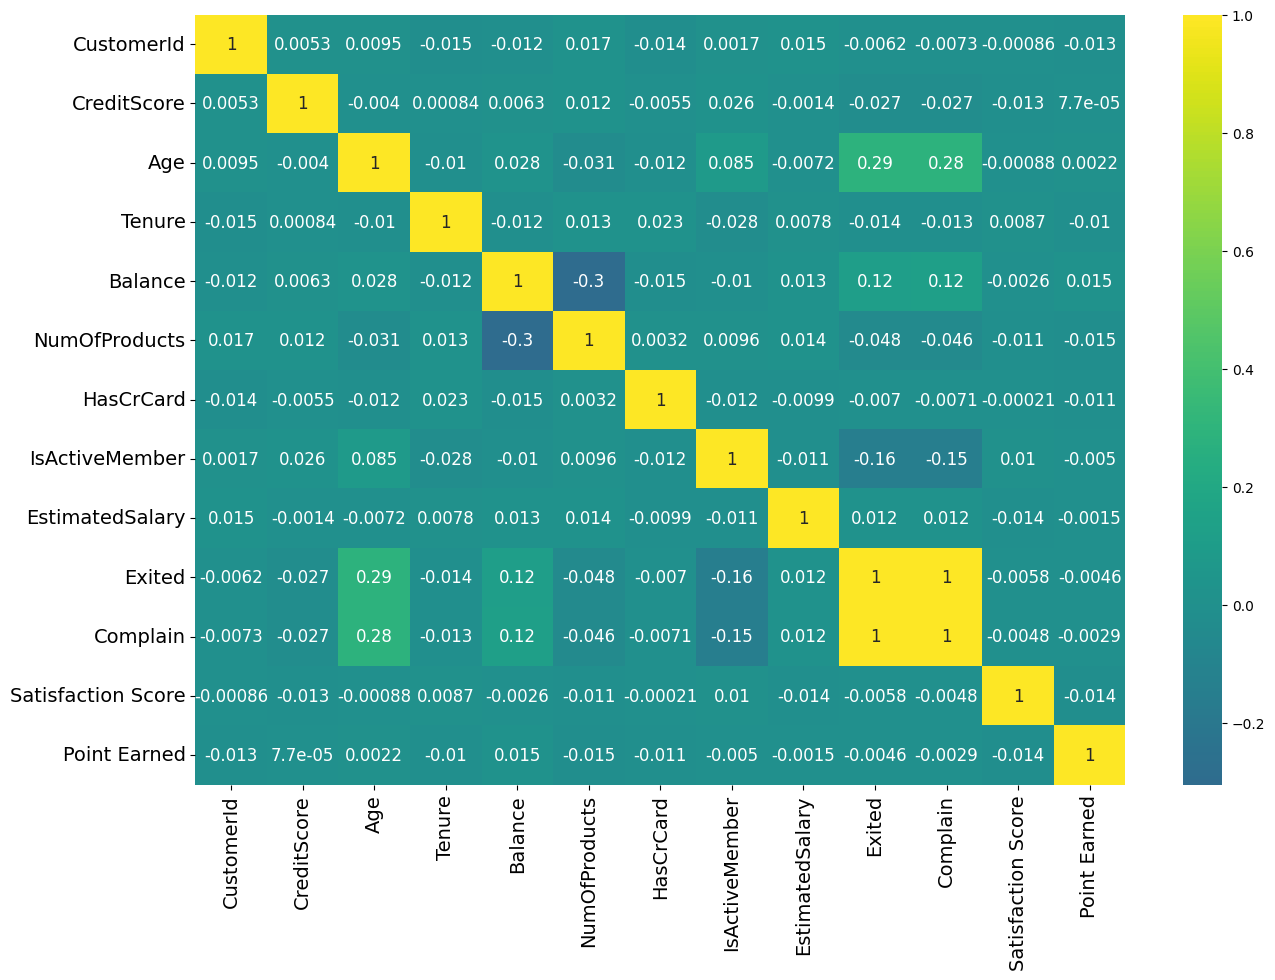

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(cb.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# data cleaning: clean

In [19]:
cb.duplicated().sum()

0

In [20]:
cb.isnull().sum()

CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [21]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

## CustomerId

In [22]:
cb.CustomerId.duplicated().sum()

# clean

0

<Axes: >

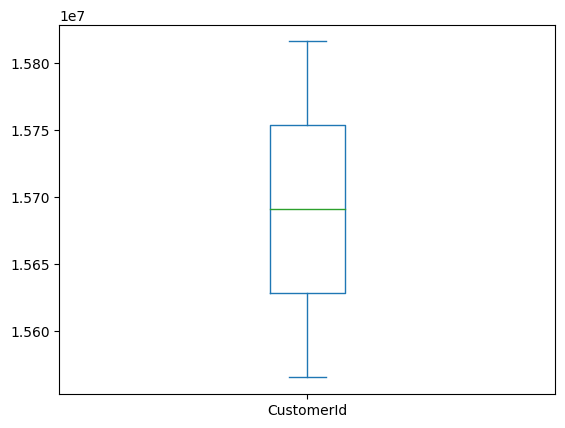

In [23]:
cb.CustomerId.plot.box()

## Surname

In [24]:
cb.columns

# clean

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [25]:
cb.Surname.value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

## CreditScore

<Axes: >

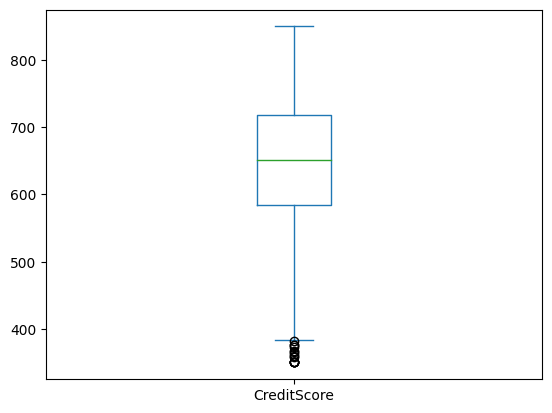

In [26]:
cb.CreditScore.plot.box()

# there are outliers but reasonable -- Kept

In [27]:
cb.CreditScore.min()

350

In [28]:
cb[cb.CreditScore < 400].shape

(19, 17)

In [29]:
def credit_dict(score):
    if score > 800:
        return '800 - 900'
    elif score > 700:
        return '700 - 800'
    elif score > 600:
        return '600 - 700'
    elif score > 500:
        return '500 - 600'
    elif score > 400:
        return '400 - 500'
    elif score > 300:
        return '300 - 400'
    else:
        return 'Not in credits'

In [30]:
cb['Credit Rank'] = cb.CreditScore.apply(credit_dict)

## Geography

In [31]:
cb.Geography.isnull().sum()

# clean

0

## Gender

In [32]:
cb.Gender.value_counts()

# clean

Gender
Male      5457
Female    4543
Name: count, dtype: int64

## Age

<Axes: >

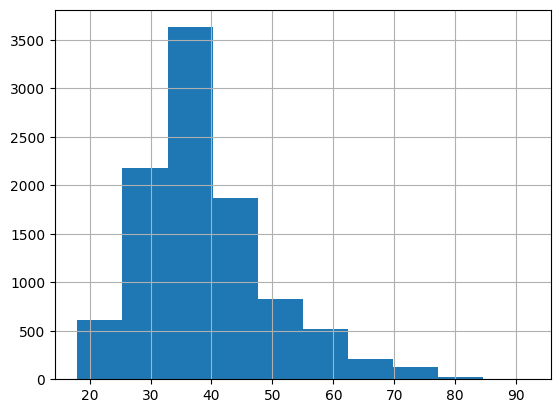

In [33]:
cb.Age.hist()

# clean

In [34]:
def age_dict(age):
    if age > 50:
        return 'Senior'
    elif age >= 30:
        return 'Adult'
    elif age < 30:
        return 'Young_adult'
    else:
        return 'Not in Age'

In [35]:
cb['Age rank'] = cb.Age.apply(age_dict)

In [36]:
cb.Age.value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

## Tenure

<Axes: >

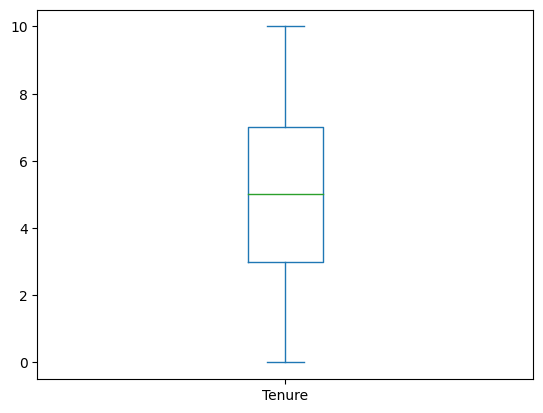

In [37]:
cb.Tenure.plot.box()

# clean

## Balance

<Axes: >

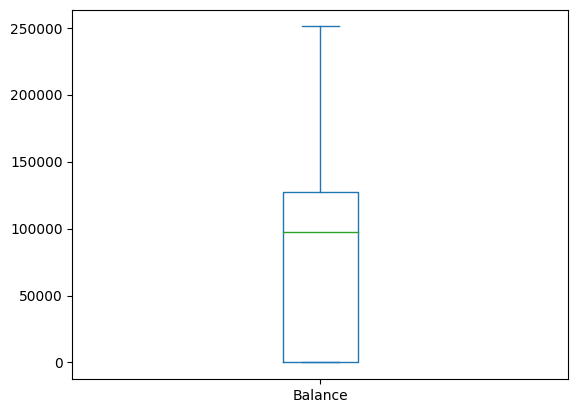

In [38]:
cb.Balance.plot.box()

# clean

In [39]:
cb['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [40]:
def balance_dict(balance):
    if balance > 150000:
        return 'Balance high'
    elif balance >= 50000:
        return 'Balance medium'
    elif balance < 50000:
        return 'Balance small'
    else:
        return 'Not in Balance'

In [41]:
cb['Balance Rank'] = cb['Balance'].apply(balance_dict)

In [42]:
cb['Balance Rank'].value_counts()

Balance Rank
Balance medium    5339
Balance small     3692
Balance high       969
Name: count, dtype: int64

## Num of Products

In [43]:
cb.NumOfProducts.value_counts()

# clean

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [44]:
cb.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'Credit Rank', 'Age rank', 'Balance Rank'],
      dtype='object')

In [45]:
cb[cb['NumOfProducts'] == 4]['Exited'].value_counts()


Exited
1    60
Name: count, dtype: int64

Cause of all boolean columns has erorr while drawing charts in PBI, change to objects booleans.

## Has Credit Card

In [46]:
CrCard_dict = {1: 'Using Credit Card', 0: 'Not using Credit Card'}
cb.HasCrCard = cb.HasCrCard.map(CrCard_dict)
cb.HasCrCard.value_counts()

# clean

HasCrCard
Using Credit Card        7055
Not using Credit Card    2945
Name: count, dtype: int64

In [ ]:
credit_churn = cb[['HasCrCard', 'Exited']]

credit_churn.head(5)

,HasCrCard,Exited
0,Using Credit Card,1
1,Not using Credit Card,0
2,Using Credit Card,1
3,Not using Credit Card,0
4,Using Credit Card,0


,HasCrCard,Exited
0,Using Credit Card,1
1,Not using Credit Card,0
2,Using Credit Card,1
3,Not using Credit Card,0
4,Using Credit Card,0


In [ ]:
credit_churn.head()

,HasCrCard,Exited
0,Using Credit Card,1
1,Not using Credit Card,0
2,Using Credit Card,1
3,Not using Credit Card,0
4,Using Credit Card,0


In [ ]:
credit_loyal = credit_churn[(credit_churn['HasCrCard'] == 'Using Credit Card') & (credit_churn['Exited'] == 0)]['HasCrCard'].count()
credit_leave = credit_churn[(credit_churn['HasCrCard'] == 'Using Credit Card') & (credit_churn['Exited'] == 1)]['HasCrCard'].count()
no_credit_loyal = credit_churn[(credit_churn['HasCrCard'] == 'Not using Credit Card') & (credit_churn['Exited'] == 0)]['HasCrCard'].count()
no_credit_leave = credit_churn[(credit_churn['HasCrCard'] == 'Not using Credit Card') & (credit_churn['Exited'] == 1)]['HasCrCard'].count()

In [ ]:
print(credit_leave/(credit_loyal+credit_leave))
print(no_credit_loyal/(no_credit_loyal+no_credit_leave))
print(credit_loyal)
print(no_credit_loyal)
print(credit_leave)
print(no_credit_leave)

0.20198440822111977
0.7918505942275043
5630
2332
1425
613


# Is active member

In [ ]:
IsActiveMember_dict = {1: 'Active', 0: 'Not active'}
cb.IsActiveMember = cb.IsActiveMember.map(IsActiveMember_dict)
cb.IsActiveMember.value_counts()

IsActiveMember
Active        5151
Not active    4849
Name: count, dtype: int64

## Estimated Salary

<Axes: >

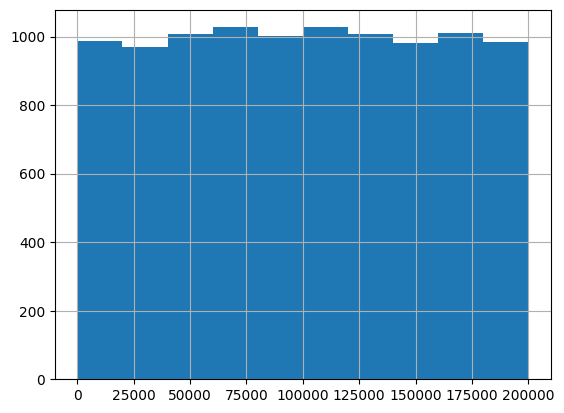

In [ ]:
cb.EstimatedSalary.hist()

# clean

In [ ]:
def salary_dict(salary):
    if salary > 150000:
        return '150k - 200k'
    elif salary > 100000:
        return '100k - 150k'
    elif salary > 50000:
        return '50k - 100k'
    elif salary > 0:
        return '0 - 50k'
    else:
        return 'Not in Salary'

In [ ]:
cb['Salary Rank'] = cb.EstimatedSalary.apply(salary_dict)

In [ ]:
cb.EstimatedSalary.unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

## Exited

In [ ]:
# Exited: Change booleans
Exited_dict = {0: 'Client', 1: 'Leave'}
cb.Exited = cb.Exited.map(Exited_dict)
cb.Exited.value_counts()

Exited
Client    7962
Leave     2038
Name: count, dtype: int64

## Complain

In [ ]:
# Complain: Change booleans
Complain_dict = {0: 'No comment', 1: 'Complain'}
cb['Complain_dict'] = cb.Complain.map(Complain_dict)
cb.Complain.value_counts()

Complain
0    7956
1    2044
Name: count, dtype: int64

## Satisfaction Score

In [ ]:
# Satisfaction Score: Clean

cb['Satisfaction Score'].value_counts()

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

## Card Type

In [ ]:
# Card Type: Clean

cb['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

## Point Earned

<Axes: >

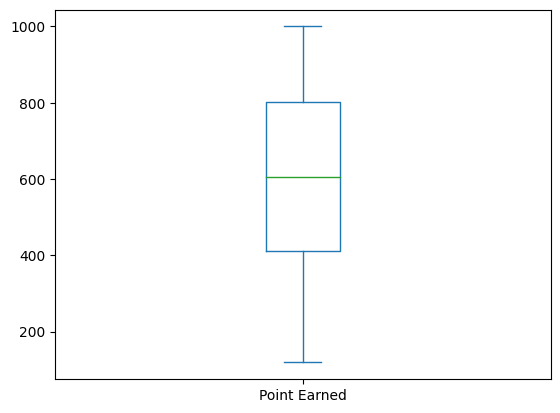

In [ ]:
# Point Earned

cb['Point Earned'].plot.box()

# split

In [ ]:
lost_customer = cb[cb['Exited'] == 'Leave']
lost_customer.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Credit Rank,Age rank,Balance Rank,Salary Rank,Complain_dict
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Using Credit Card,...,Leave,1,2,DIAMOND,464,600 - 700,Adult,Balance small,100k - 150k,Complain
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Using Credit Card,...,Leave,1,3,DIAMOND,377,500 - 600,Adult,Balance high,100k - 150k,Complain
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,Using Credit Card,...,Leave,1,5,DIAMOND,484,600 - 700,Adult,Balance medium,100k - 150k,Complain
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,Using Credit Card,...,Leave,1,2,DIAMOND,282,300 - 400,Young_adult,Balance medium,100k - 150k,Complain
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,Using Credit Card,...,Leave,0,2,SILVER,163,600 - 700,Senior,Balance medium,0 - 50k,No comment


In [ ]:
current_customer = cb[cb['Exited'] == 'Client']
current_customer.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Credit Rank,Age rank,Balance Rank,Salary Rank,Complain_dict
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,Not using Credit Card,...,Client,1,3,DIAMOND,456,600 - 700,Adult,Balance medium,100k - 150k,Complain
3,15701354,Boni,699,France,Female,39,1,0.00,2,Not using Credit Card,...,Client,0,5,GOLD,350,600 - 700,Adult,Balance small,50k - 100k,No comment
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Using Credit Card,...,Client,0,5,GOLD,425,800 - 900,Adult,Balance medium,50k - 100k,No comment
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,Using Credit Card,...,Client,0,2,SILVER,206,800 - 900,Adult,Balance small,0 - 50k,No comment
8,15792365,He,501,France,Male,44,4,142051.07,2,Not using Credit Card,...,Client,0,3,GOLD,251,500 - 600,Adult,Balance medium,50k - 100k,No comment


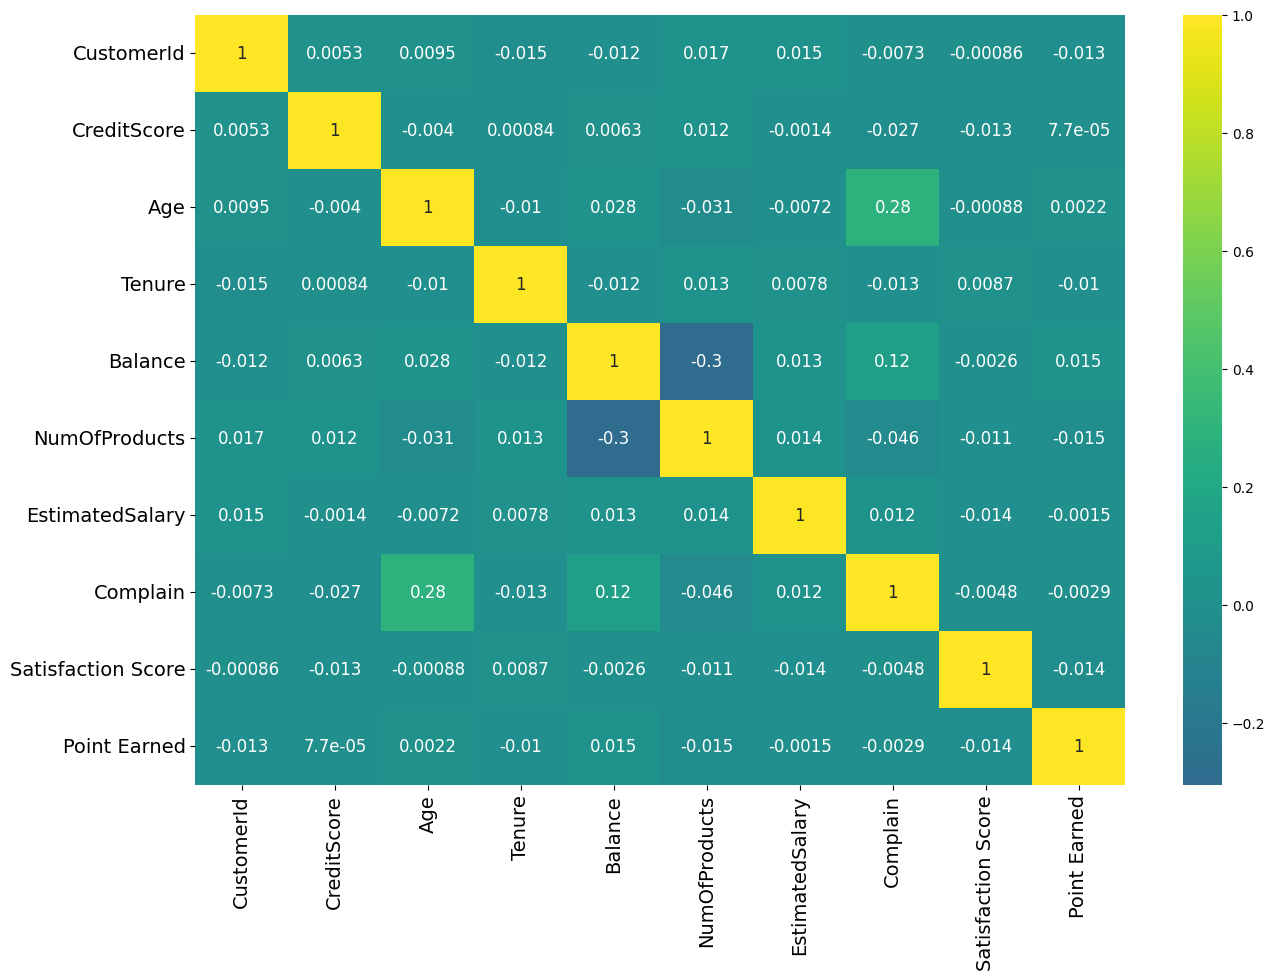

# Download

In [ ]:
cb.to_csv('Customer_data.csv', index=False)

In [ ]:
lost_customer.to_csv('Lost_customer.csv')
current_customer.to_csv('Current_customer.csv')